In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def plot_lines(df, subplots, title, xlabel, ylabel):
    '''Generates one or more line plots from pandas dataframe'''
    
    fig, ax = subplots
    ax = df.plot.line(ax=ax)
    ax.set_xlabel(xlabel, fontdict={'size' : 14})
    ax.set_ylabel(ylabel, fontdict={'size' : 14})
    ax.set_title(title, fontdict={'size' : 18}) 
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)


In [25]:
import os
os.chdir("/Users/Dell/Downloads")
trip_df = pd.read_csv('BSS.csv')


In [26]:
memberships_df = trip_df.groupby('membership').size()
print('Found {} different memberships:\n'.format(memberships_df.shape[0]))
print(memberships_df)

Found 19 different memberships:

membership
3-Day Weekender                          2
Aluminum Access                         40
Annual                                  98
Annual Member                           53
Annual Membership                       32
Annual Pass                              9
Annual Plus                             18
Explorer                              1818
HT Ram Membership                      120
Local30                               4856
Local365                             10745
Local365 Youth (age 13-17 riders)       19
Local365+Guest Pass                   1960
Madtown Monthly                          1
Republic Rider (Annual)                 57
U.T. Student Membership              79392
UT Student Membership                    8
Walk Up                              21652
Weekender                             5241
dtype: int64


In [79]:

# print(plt.style.available)
# plt.style.use('seaborn-paper')
PLT_DPI = 150

In [29]:
def clean_memberships(df, col):
    '''Cleans memberships by consolidating and converting to categories
    INPUT: df - pandas Dataframe containing membership columns
           col - column name to be consolidated
    RETURNS: pandas DataFrame with consolidated memberships'''
    
    # Replace the various memberships with their groupings
    df[col] = df[col].astype(str)
    df[col] = df[col].replace(['RideScout Single Ride','Try Before You Buy Special'], value='single')
    df[col] = df[col].replace(['^24-Hour.*$', '^Explorer.*$', '^Walk Up$'], value='day', regex=True)
    df[col] = df[col].replace(['^ACL Weekend Pass.*$', '^FunFunFun.*$', '^Weekender.*$'], value='weekend', regex=True)
    df[col] = df[col].replace(['^7-Day.*$'], value='week', regex=True)
    df[col] = df[col].replace(['^Local30.*$'], value='month', regex=True)
    df[col] = df[col].replace(['^Semester.*$'], value='semester', regex=True)
    df[col] = df[col].replace(['^Annual.*$', '^Local365.*$', 'Republic Rider.*$', '^Membership: pay once  one-year.*$'], value='year', regex=True)
    df[col] = df[col].replace(['^Founding Member.*$', '^.*Founder.*$'], value='triannual', regex=True)

    # Drop the remaining trips (PROHIBITED and RESTRICTED)
    drop_mask = (df['membership'] == 'PROHIBITED') | (df['membership'] == 'RESTRICTED')
    df = df[~drop_mask]
    
    # Finally convert to categorical
    df[col] = df[col].astype('category')
    return df
    
trip_df = clean_memberships(trip_df, 'membership')
def clean_memberships(df, col):
    '''Cleans memberships by consolidating and converting to categories
    INPUT: df - pandas Dataframe containing membership columns
           col - column name to be consolidated
    RETURNS: pandas DataFrame with consolidated memberships'''
    
    # Replace the various memberships with their groupings
    df[col] = df[col].astype(str)
    df[col] = df[col].replace(['RideScout Single Ride','Try Before You Buy Special'], value='single')
    df[col] = df[col].replace(['^24-Hour.*$', '^Explorer.*$', '^Walk Up$'], value='day', regex=True)
    df[col] = df[col].replace(['^ACL Weekend Pass.*$', '^FunFunFun.*$', '^Weekender.*$'], value='weekend', regex=True)
    df[col] = df[col].replace(['^7-Day.*$'], value='week', regex=True)
    df[col] = df[col].replace(['^Local30.*$'], value='month', regex=True)
    df[col] = df[col].replace(['^Semester.*$'], value='semester', regex=True)
    df[col] = df[col].replace(['^Annual.*$', '^Local365.*$', 'Republic Rider.*$', '^Membership: pay once  one-year.*$'], value='year', regex=True)
    df[col] = df[col].replace(['^Founding Member.*$', '^.*Founder.*$'], value='triannual', regex=True)

    # Drop the remaining trips (PROHIBITED and RESTRICTED)
    drop_mask = (df['membership'] == 'PROHIBITED') | (df['membership'] == 'RESTRICTED')
    df = df[~drop_mask]
    
    # Finally convert to categorical
    df[col] = df[col].astype('category')
    return df
    
trip_df = clean_memberships(trip_df, 'membership')
print(trip_df.groupby('membership').size())
print(trip_df.info())

membership
3-Day Weekender                2
Aluminum Access               40
HT Ram Membership            120
Madtown Monthly                1
U.T. Student Membership    79392
UT Student Membership          8
day                        23470
month                       4856
nan                         1458
weekend                     5241
year                       12991
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127579 entries, 0 to 127578
Data columns (total 15 columns):
trip_id               127579 non-null int64
membership            127579 non-null category
bike_id               127579 non-null int64
checkout_date         127579 non-null object
checkout _time        127579 non-null object
datetime              127579 non-null object
checkout_kiosk _id    125906 non-null float64
checkout_kiosk        127579 non-null object
checkin_kiosk_id      125736 non-null float64
checkin_kiosk         127579 non-null object
duration              127579 non-null int64
month 

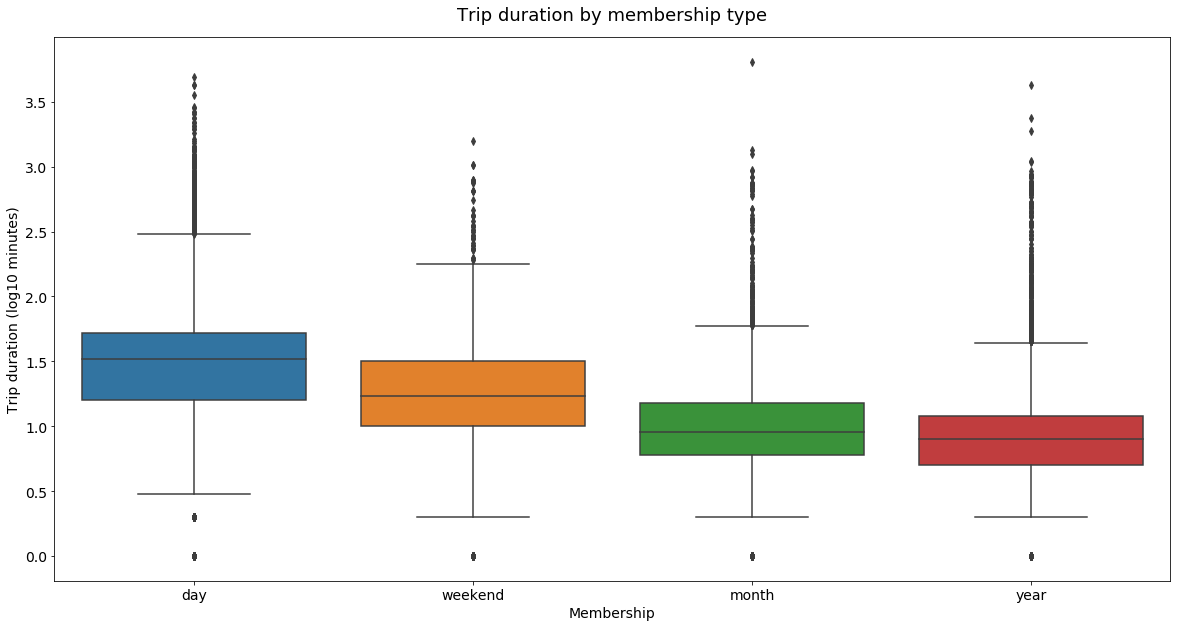

In [38]:
# Show histogram of trip duration by membership type
# g = sns.FacetGrid(trip_df, row='membership', sharey=False, sharex=False, margin_titles=True, size=4)
# g.map(plt.hist, 'duration')
trip_df 

membership_order = ['day', 'weekend', 'month', 'year']

def plot_boxplot(df, order, x, y, figsize, title, xlabel, ylabel):
    '''Plots a boxplot using given '''
    fig, ax = plt.subplots(1,1, figsize=figsize)  
    ax = sns.boxplot(data=df, x=x, y=y, order=order)
    ax.set_xlabel(xlabel, fontdict={'size' : 14})
    ax.set_ylabel(ylabel, fontdict={'size' : 14})
    ax.set_title(title, fontdict={'size' : 18})
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ttl = ax.title
    ttl.set_position([.5, 1.02])

# Log-transform the durations to compress range
trip_df['log_duration'] = trip_df['duration'].apply(np.log10)
plot_boxplot(trip_df, order=membership_order, x='membership', y='log_duration', figsize=(20,10),
            title='Trip duration by membership type', xlabel='Membership', ylabel='Trip duration (log10 minutes)')
# sns.boxplot(data=trip_df, x='membership', y='duration')

# g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
# bins = np.linspace(0, 60, 13)
# g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

In [32]:
# Show some of the longest trips
trip_df.sort_values('duration', ascending=False).head(10)

,trip_id,membership,bike_id,checkout_date,checkout _time,datetime,checkout_kiosk _id,checkout_kiosk,checkin_kiosk_id,checkin_kiosk,duration,month,year,day,hour,log_duration
8469,16675492,U.T. Student Membership,874,02-09-2018,18:56:59,02-09-2018 18:56:59,3797.0,21st & University,NaN,Stolen,6832,2,2018,9,18,3.834548
120151,18477582,month,40,09-07-2018,03:55:07,09-07-2018 03:55:07,2565.0,Trinity & 6th Street,2539.0,Convention Center / 3rd & Trinity,6405,9,2018,7,3,3.806519
110810,18207750,day,647,08-09-2018,22:54:44,08-09-2018 22:54:44,2575.0,Riverside @ S. Lamar,2497.0,Capitol Station / Congress & 11th,4898,8,2018,9,22,3.690019
74344,17294199,U.T. Student Membership,16,05-06-2018,11:06:12,05-06-2018 11:06:12,3798.0,21st & Speedway @PCL,2711.0,Barton Springs @ Kinney Ave,4460,5,2018,6,11,3.649335
71380,17272785,U.T. Student Membership,212,05-04-2018,11:01:36,05-04-2018 11:01:36,3795.0,Dean Keeton & Whitis,3798.0,21st & Speedway @PCL,4298,5,2018,4,11,3.633266
8211,16674113,day,1782,02-09-2018,14:29:23,02-09-2018 14:29:23,2504.0,South Congress & Elizabeth,3619.0,6th & Congress,4286,2,2018,9,14,3.632052
8257,16674245,day,1524,02-09-2018,14:49:33,02-09-2018 14:49:33,2504.0,South Congress & Elizabeth,3619.0,6th & Congress,4266,2,2018,9,14,3.630021
8261,16674253,year,1551,02-09-2018,14:50:30,02-09-2018 14:50:30,2567.0,Palmer Auditorium,3619.0,6th & Congress,4265,2,2018,9,14,3.629919
8262,16674254,nan,2130,02-09-2018,14:50:40,02-09-2018 14:50:40,2567.0,Palmer Auditorium,3619.0,6th & Congress,4265,2,2018,9,14,3.629919
88361,17541702,U.T. Student Membership,2204,06-02-2018,03:47:56,06-02-2018 03:47:56,2537.0,West & 6th St.,2549.0,Long Center @ South 1st & Riverside,3998,6,2018,2,3,3.601843


In [39]:
# What are the stats for yearly memberships?
trip_df.loc[trip_df['membership'] == 'month', 'duration'].describe()

count    4856.000000
mean       19.857084
std       108.099190
min         0.000000
25%         6.000000
50%         9.000000
75%        15.000000
max      6405.000000
Name: duration, dtype: float64

count    502.000000
mean     254.141434
std       95.033737
min        4.000000
25%      193.250000
50%      247.000000
75%      315.750000
max      580.000000
dtype: float64

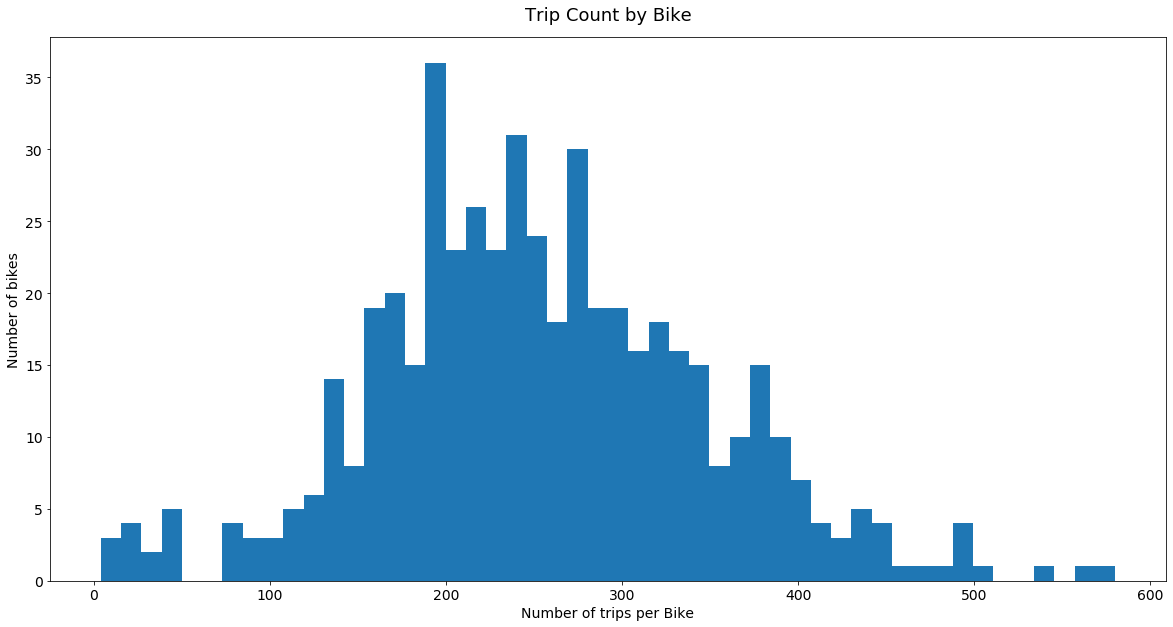

In [46]:
# Let's see how many times each of the bikes were rented out

def plot_hist(df_col, bins, size, title, xlabel, ylabel):
    '''Plots a histogram of the dataframe column'''
    
    fig, ax = plt.subplots(1, 1, figsize=size)
    ax = df_col.plot.hist(ax=ax, bins=bins)
    ax.set_xlabel(xlabel, fontdict={'size' : 14})
    ax.set_ylabel(ylabel, fontdict={'size' : 14})
    ax.set_title(title, fontdict={'size' : 18}) 
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)   

bikes_df = trip_df.groupby('bike_id').size()
plot_hist(bikes_df, bins=50, size=(20,10), 
          title='Trip Count by Bike', 
          xlabel='Number of trips per Bike', 
          ylabel='Number of bikes')

bikes_df.describe()

In [47]:
# Create a set of all the checkout and checkin kiosks. 
# If the sizes are different we have some checkin or checkout only ones.
checkins = set(trip_df['checkin_kiosk'].unique())
checkouts = set(trip_df['checkout_kiosk'].unique())

print('Number of unique checkin kiosks: {}, checkout kiosks: {}'.format(len(checkins), len(checkouts)))

Number of unique checkin kiosks: 82, checkout kiosks: 78


In [49]:

# Hmm ! Let's see which stations are in checkin and checkout, and which are in one only

def venn_stats(left, right, verbose=False, left_name=None, right_name=None):
    '''Creates Venn Diagram stats for two sets, left and right
    INPUTS: left = set of items on left
            right = set of items on right
            verbose = bool to print out set overlap and count info
            left_name = string used if verbose == True. Describes left set
            right_name = string used if verbose == True. Describes right set
    '''
    left_only = left - right
    left_and_right = left & right
    right_only = right - left
    
    if verbose:
        print('{} size = {}, {} size = {}'.format(left_name, len(left), right_name, len(right)))
        print('\nIntersection of {} and {} ({}):\n{}'.format(left_name, right_name, len(left_and_right), left_and_right))
        print('\n{}-only ({}):\n{}'.format(left_name, len(left_only), left_only))
        print('\n{}-only ({}):\n{}'.format(right_name, len(right_only), right_only))

    return (left_only, left_and_right, right_only)

venn_stations = venn_stats(checkouts, checkins, 
                          verbose=True, left_name='checkout', right_name='checkin')

checkout_only_stations, common_stations, checkin_only_stations = venn_stations

checkout size = 78, checkin size = 82

Intersection of checkout and checkin (78):
{'Brazos & 6th', '4th & Congress', 'City Hall / Lavaca & 2nd', '5th & Bowie', 'Pfluger Bridge @ W 2nd Street', '21st & Speedway @PCL', 'South Congress & James', 'Convention Center / 4th St. @ MetroRail', 'Zilker Park', 'Rio Grande & 28th', 'Guadalupe & 21st', 'South Congress & Barton Springs at the Austin American-Statesman', '6th & Chalmers', 'Rainey St @ Cummings', '13th & San Antonio', '8th & Congress', 'Lake Austin & Enfield', 'South Congress & Elizabeth', 'Medina & East 6th', 'Dean Keeton & Whitis', 'Lavaca & 6th', 'Sterzing at Barton Springs', '5th & Campbell', 'Lake Austin Blvd @ Deep Eddy', 'South Congress @ Bouldin Creek', 'Dean Keeton & Speedway', 'Riverside @ S. Lamar', 'Lakeshore @ Austin Hostel', 'East 6th & Pedernales St.', 'East 6th at Robert Martinez', 'Trinity & 6th Street', '3rd & West', 'State Capitol Visitors Garage @ San Jacinto & 12th', 'Nueces & 3rd', '17th & Guadalupe', '23rd & San

In [50]:

# Let's deal with the checkin and checkout only stations
checkout_only_mask = trip_df['checkout_kiosk'].isin(checkout_only_stations)
checkout_only_count = np.sum(checkout_only_mask)
all_rows_count = trip_df.shape[0]
checkout_only_pct = (checkout_only_count / all_rows_count) * 100.0
checkout_only_df = trip_df[checkout_only_mask]
print('Number of checkout-only rows: {}, {:.4f}% of total'.format(checkout_only_count, checkout_only_pct))

if checkout_only_count > 0:
    trip_df = trip_df[~checkout_only_mask]
print('Trips Dataframe shape is {}'.format(trip_df.shape))
checkout_only_df.groupby('checkout_kiosk').size()

Number of checkout-only rows: 0, 0.0000% of total
Trips Dataframe shape is (127579, 16)


Series([], dtype: int64)

In [51]:
checkin_only_mask = trip_df['checkin_kiosk'].isin(checkin_only_stations)
checkin_only_count = np.sum(checkin_only_mask)
all_rows_count = trip_df.shape[0]
checkin_only_pct = (checkin_only_count / all_rows_count) * 100.0
checkin_only_df = trip_df[checkin_only_mask]
print('Number of checkin-only rows: {}'.format(checkin_only_df.shape[0]))

if checkin_only_count > 0:
    trip_df = trip_df[~checkin_only_mask]
print('Trips Dataframe shape is {}'.format(trip_df.shape))
checkin_only_df.groupby('checkin_kiosk').size()

Number of checkin-only rows: 29
Trips Dataframe shape is (127550, 16)


checkin_kiosk
Fantasy Zilker    16
Main Office        6
Repair Shop        5
Stolen             2
dtype: int64

In [52]:
# Now all stations are common in checkin and checkout
checkouts_df = trip_df.groupby('checkout_kiosk').size().to_frame('checkouts').reset_index()
checkins_df = trip_df.groupby('checkin_kiosk').size().to_frame('checkins').reset_index()
station_df = pd.merge(checkins_df, checkouts_df, left_on='checkin_kiosk', right_on='checkout_kiosk')
station_df = station_df.drop('checkout_kiosk', axis=1)
station_df.columns = ['name', 'checkins', 'checkouts']
station_df['total'] = station_df['checkins'] + station_df['checkouts']
station_df = station_df.sort_values('total', ascending=False).reset_index(drop=True)
station_df.head()

,name,checkins,checkouts,total
0,21st & Speedway @PCL,22337,21607,43944
1,Dean Keeton & Speedway,8388,7514,15902
2,23rd & Rio Grande,6615,7312,13927
3,22nd & Pearl,5781,6898,12679
4,Rio Grande & 28th,4987,5734,10721


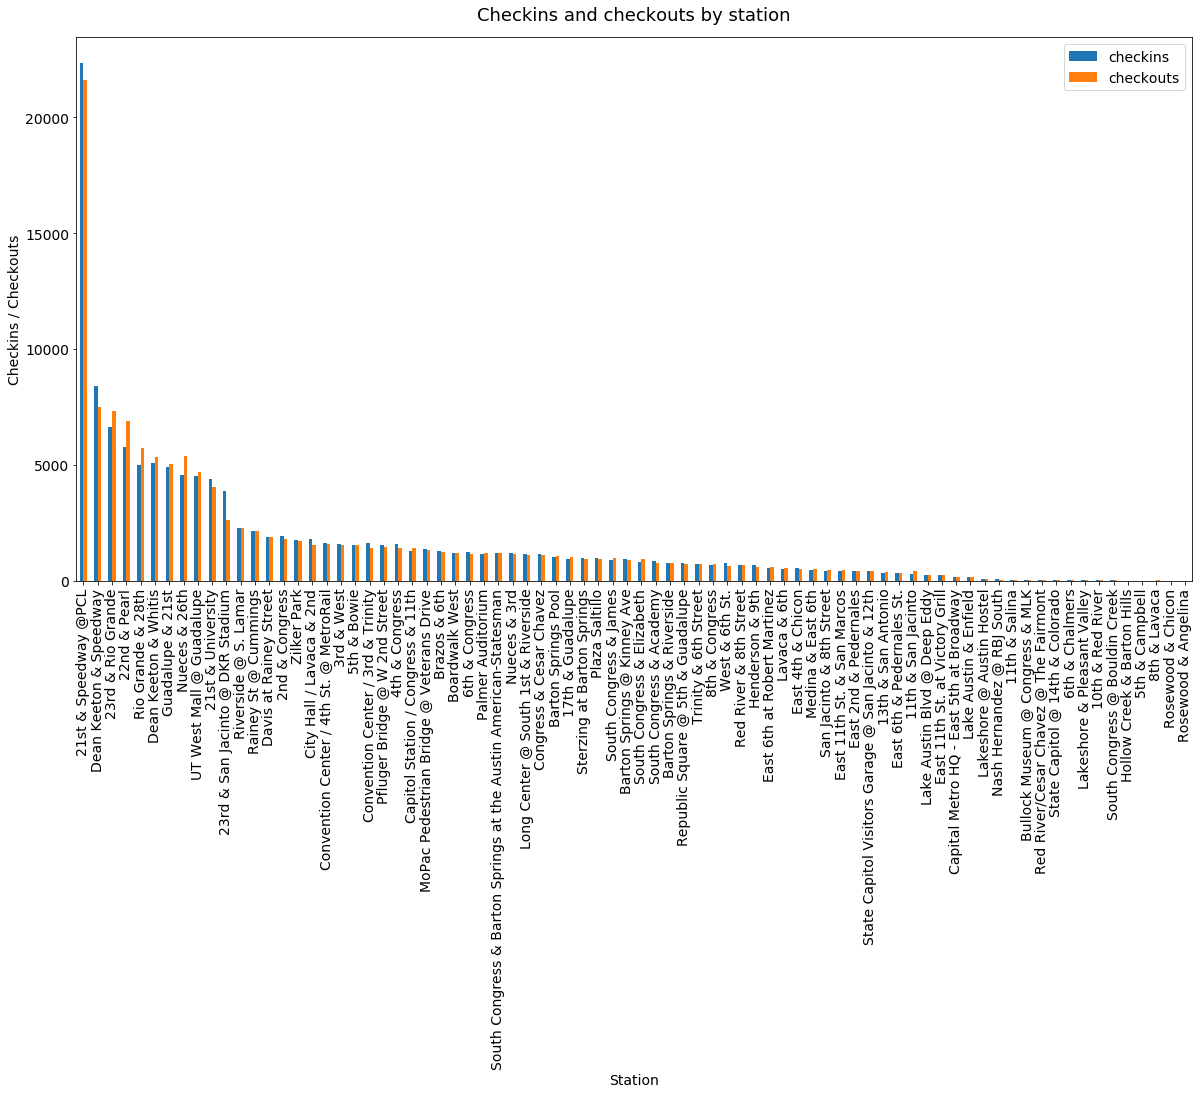

In [53]:
# Create a bar plot of the checkins and checkouts per station
def plot_bar(df, x, y, size, title, xlabel, ylabel):
    '''Plots a bar-graph of dataframe column'''
    
    fig, ax = plt.subplots(1, 1, figsize=size)
    ax = df.plot.bar(ax=ax, x=x, y=y)
    ax.set_xlabel(xlabel, fontdict={'size' : 14})
    ax.set_ylabel(ylabel, fontdict={'size' : 14})
    ax.set_title(title, fontdict={'size' : 18}) 
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)   
    ax.legend(fontsize = 14)


plot_bar(station_df, x='name', y=['checkins', 'checkouts'], size=(20,10), 
         title='Checkins and checkouts by station',
        xlabel='Station', ylabel='Checkins / Checkouts')

In [54]:
# Now let's print out all the stations, and drop ones which seem temporary

def remove_rows(df, col, words, verbose=False):
    '''Removes rows containing words given
    INPUT: df - dataframe
           words - iterable containing words
    RETURNS: Dataframe with rows containing `words` removed
    '''
    new_df = df.copy()
    for word in words:
        drop_mask = new_df[col].str.contains(word)
        drop_count = np.sum(drop_mask)
        drop_df = new_df[drop_mask]
        print('Dropping {} rows containing {}:\n{}'.format(drop_count, word, drop_df[col]))
        if (drop_count > 0):
            new_df = new_df[~drop_mask]
    return new_df.reset_index(drop=True)


station_df = remove_rows(station_df, 'name', 
                 ['MapJam', 'Mobile', 'Shop', 'Marketing', 'Re-branding', 
                  'Customer Service', 'Main Office'],
                 verbose=True)
station_df = station_df.sort_values('name').reset_index(drop=True)
station_df['station_id'] = range(station_df.shape[0])
station_df['station_id'] = station_df['station_id'] + 1
station_df.head()

Dropping 0 rows containing MapJam:
Series([], Name: name, dtype: object)
Dropping 0 rows containing Mobile:
Series([], Name: name, dtype: object)
Dropping 0 rows containing Shop:
Series([], Name: name, dtype: object)
Dropping 0 rows containing Marketing:
Series([], Name: name, dtype: object)
Dropping 0 rows containing Re-branding:
Series([], Name: name, dtype: object)
Dropping 0 rows containing Customer Service:
Series([], Name: name, dtype: object)
Dropping 0 rows containing Main Office:
Series([], Name: name, dtype: object)


,name,checkins,checkouts,total,station_id
0,10th & Red River,13,19,32,1
1,11th & Salina,54,49,103,2
2,11th & San Jacinto,284,405,689,3
3,13th & San Antonio,328,386,714,4
4,17th & Guadalupe,952,1015,1967,5


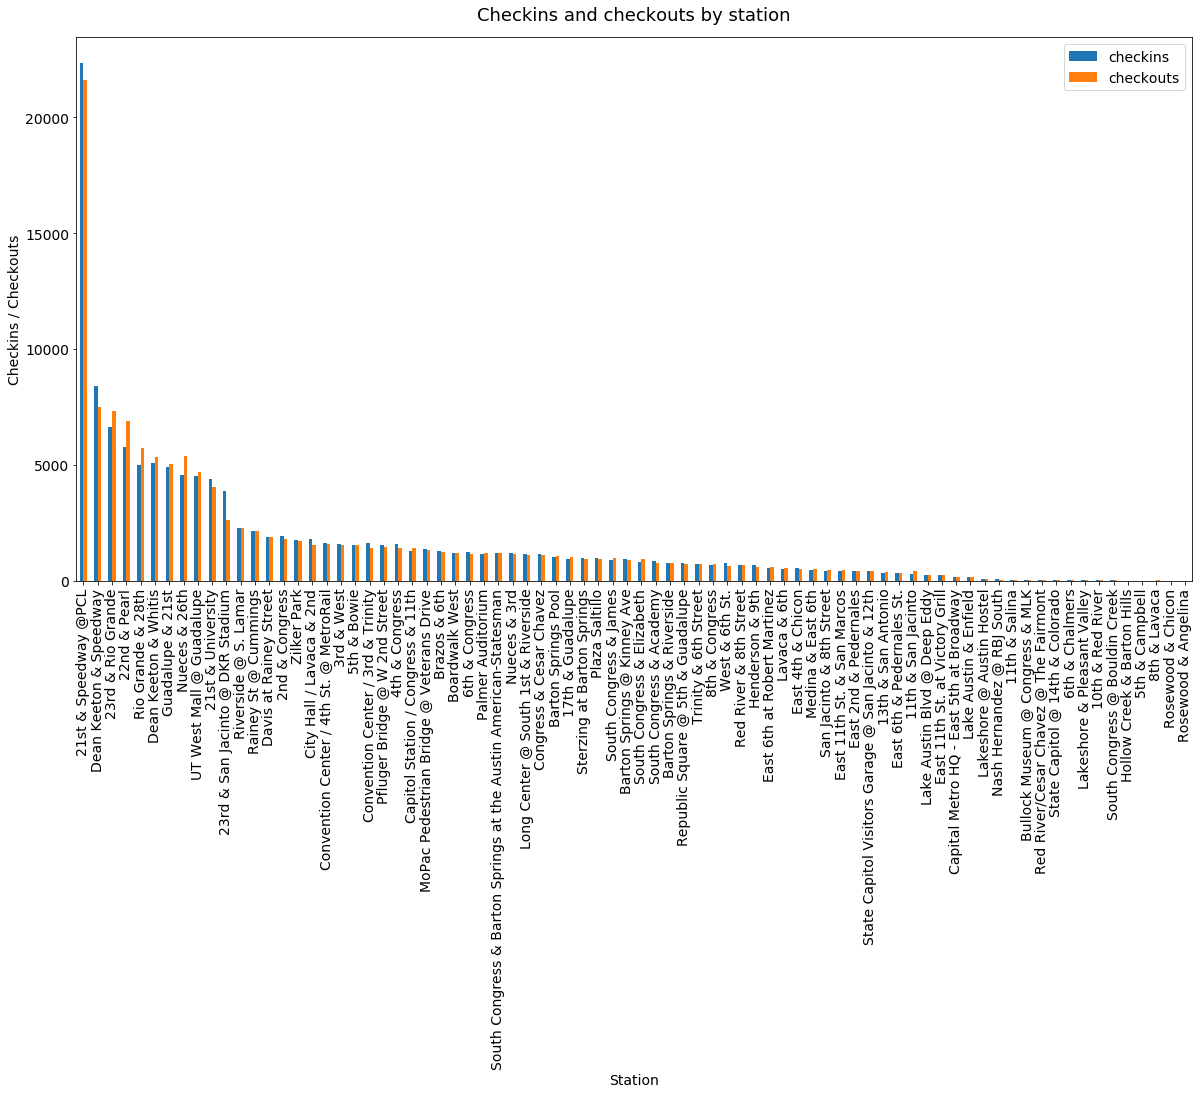

In [55]:
station_df = station_df.sort_values('total', ascending=False)
plot_bar(station_df, x='name', y=['checkins', 'checkouts'], size=(20,10), 
         title='Checkins and checkouts by station',
        xlabel='Station', ylabel='Checkins / Checkouts')

In [80]:
import os
os.chdir("/Users/Dell/Downloads")
all_stations_df = pd.read_csv('BS_Stations.csv')

In [81]:
all_stations_df.head()

,lat,latlon,lon,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


# Normalizing

In [82]:
n_trips = trip_df.shape[0]
print('Before normalizing, bikes_df has {} rows'.format(n_trips))
stations = set(all_stations_df['name'])
print('{} stations in station table'.format(len(stations)))


def venn_stats_df(df, left_col, right_col, verbose=False):
    '''Creates Venn Diagram stats for two sets, left and right
    INPUTS: df - Dataframe with columns to check for overlaps
            left_col = Dataframe column to use as left items
            right_col = Dataframe column to use as right items
            verbose = bool to print out set overlap and count info
    '''
    left = set(df[left_col].unique())
    right = set(df[left_col].unique())

    left_only = left - right
    left_and_right = left & right
    right_only = right - left
    
    if verbose:
        print('{} size = {}, {} size = {}'.format(left_col, len(left), right_col, len(right)))
        print('\nIntersection of {} and {} ({}):\n{}'.format(left_col, right_col, len(left_and_right), left_and_right))
        print('\n{}-only ({}):\n{}'.format(left_col, len(left_only), left_only))
        print('\n{}-only ({}):\n{}'.format(right_col, len(right_only), right_only))

    return (left_only, left_and_right, right_only)

l, m, r = venn_stats_df(trip_df, left_col='checkin_kiosk', right_col='checkout_kiosk', verbose='True')
bike_stations = m

l, m, r = venn_stats(bike_stations, stations, left_name='bike_stations', right_name='station_table', verbose=True)
bike_stations_only = l

bike_stations_only_checkin_mask = trip_df['checkin_kiosk'].isin(bike_stations_only)
bike_stations_only_checkout_mask = trip_df['checkout_kiosk'].isin(bike_stations_only)
bike_stations_only_mask = bike_stations_only_checkin_mask | bike_stations_only_checkout_mask
bike_stations_only_count = np.sum(bike_stations_only_mask)
n_dropped_trips = n_trips - bike_stations_only_count

print('Pre-normalize row count: {}, post-normalize: {}'.format(n_trips, n_dropped_trips))

Before normalizing, bikes_df has 127550 rows
72 stations in station table
checkin_kiosk size = 78, checkout_kiosk size = 78

Intersection of checkin_kiosk and checkout_kiosk (78):
{'4th & Congress', 'Brazos & 6th', 'City Hall / Lavaca & 2nd', '5th & Bowie', 'Pfluger Bridge @ W 2nd Street', '21st & Speedway @PCL', 'South Congress & James', 'Convention Center / 4th St. @ MetroRail', 'Zilker Park', 'Rio Grande & 28th', 'Guadalupe & 21st', 'South Congress & Barton Springs at the Austin American-Statesman', '6th & Chalmers', 'Rainey St @ Cummings', '13th & San Antonio', '8th & Congress', 'Lake Austin & Enfield', 'South Congress & Elizabeth', 'Medina & East 6th', 'Dean Keeton & Whitis', 'Lavaca & 6th', 'Sterzing at Barton Springs', '5th & Campbell', 'Lake Austin Blvd @ Deep Eddy', 'South Congress @ Bouldin Creek', 'Dean Keeton & Speedway', 'Riverside @ S. Lamar', 'Lakeshore @ Austin Hostel', 'East 6th & Pedernales St.', 'East 6th at Robert Martinez', 'Trinity & 6th Street', '3rd & West', 'St

In [83]:

norm_trip_df = pd.merge(trip_df.reset_index(), all_stations_df[['name', 'station_id']], left_on='checkout_kiosk', right_on='name')
norm_trip_df = pd.merge(norm_trip_df, all_stations_df[['name', 'station_id']], left_on='checkin_kiosk', right_on='name')
norm_trip_df = norm_trip_df[['datetime', 'membership', 'bike_id', 'station_id_x', 'station_id_y', 'duration']]
norm_trip_df = norm_trip_df.rename(columns={'station_id_x' : 'checkout_id', 'station_id_y' : 'checkin_id'})
norm_trip_df = norm_trip_df.sort_values('datetime')
norm_trip_df = norm_trip_df.set_index('datetime', drop=True)
# norm_trip_df
      
print('After normalizing, bikes_df has {} rows'.format(norm_trip_df.shape[0]))
print('\nNull columns report:\n{}'.format(norm_trip_df.isnull().sum()))


After normalizing, bikes_df has 48001 rows

Null columns report:
membership     0
bike_id        0
checkout_id    0
checkin_id     0
duration       0
dtype: int64


In [84]:
# Save out the trips and stations dataframe
norm_trip_df.to_csv('all_trips_clean.csv')
all_stations_df.to_csv('all_stations_clean.csv', index=False)
norm_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48001 entries, 01-01-2018 00:39:02 to 10-12-2018 17:06:25
Data columns (total 5 columns):
membership     48001 non-null category
bike_id        48001 non-null int64
checkout_id    48001 non-null int64
checkin_id     48001 non-null int64
duration       48001 non-null int64
dtypes: category(1), int64(4)
memory usage: 1.9+ MB
